### A6: Presentaciones intermedias

Los datos que presentaré a continuación fueron obtenidos de DataMéxico. Lo que describen es la evolución de los salarios y el número de funcionarios de cinco distintas ingenierías a lo largo del tiempo.

El tiempo lo dividen en cuartiles y aborda desde el tercer cuarto del año 2012 hasta el segundo cuarto del 2021. Las ingenierías que incluye son:
- Ingeniería química
- Ingeniería civil
- Ingeniería en minas y metalurgia
- Ingeniería mecánica
- Ingeniería industrial

Las demás columnas son ID's para la ocupación, el tiempo 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%ls

 00_00_binder.ipynb
 00_00_primer_pasos.ipynb
 01_01_data_types.ipynb
 01_02_read_iloc_unique_groupby.ipynb
 02_00_data_wrangling.ipynb
 02_01_null_display.ipynb
 02_02_basic_math.ipynb
 A5.ipynb
 A6.ipynb
 adult.csv
 antropometria-dataset-1.csv
 antropometria-dataset-2.csv
 clase1.ipynb
 Clase3.ipynb
 Clase4.ipynb
 Clase5.ipynb
 datasets/
'datos multivariante.xlsx'
 Evolucion-poblacion-ocupada-trabajadores-totales.csv
 README.md
 requirements.txt


In [4]:
df = pd.read_csv('Evolucion-poblacion-ocupada-trabajadores-totales.csv')
df.head(2)

,Occupation ID,Occupation,Quarter ID,Quarter,Workforce,Monthly Wage,Time,type,type ID
0,2251,Ingenieros Químicos,20123,2012-Q3,20316,10569.376354,1343797200000,Ingenieros Químicos,2251
1,2251,Ingenieros Químicos,20124,2012-Q4,17082,6104.720173,1351749600000,Ingenieros Químicos,2251


In [5]:
df = df.drop(['Occupation ID', 'Quarter ID', 'Time', 'type ID', 'type'], axis = 1)


In [6]:
df.head(2)

,Occupation,Quarter,Workforce,Monthly Wage
0,Ingenieros Químicos,2012-Q3,20316,10569.376354
1,Ingenieros Químicos,2012-Q4,17082,6104.720173


### Hallazgo principal

Evolución del salario de un ingeniero industrial

In [13]:
df = df.set_index('Quarter')
df

,Occupation,Workforce,Monthly Wage
Quarter,,,
2012-Q3,Ingenieros Químicos,20316,10569.376354
2012-Q4,Ingenieros Químicos,17082,6104.720173
2013-Q1,Ingenieros Químicos,17919,5739.529773
2013-Q2,Ingenieros Químicos,17267,6066.082701
2013-Q3,Ingenieros Químicos,19918,4203.478261
...,...,...,...
2020-Q1,Ingenieros Civiles y de la Construcción,92135,7240.213643
2020-Q3,Ingenieros Civiles y de la Construcción,104608,6344.394779
2020-Q4,Ingenieros Civiles y de la Construcción,87693,7342.362218


In [45]:
ii = df.loc[df['Occupation'] == 'Ingenieros Industriales', 'Monthly Wage']
iq = df.loc[df['Occupation'] == 'Ingenieros Químicos', 'Monthly Wage']
ic = df.loc[df['Occupation'] == 'Ingenieros Civiles y de la Construcción', 'Monthly Wage']
ip = df.loc[df['Occupation'] == 'Ingenieros en Minas, Metalurgia y Petróleo', 'Monthly Wage']
im = df.loc[df['Occupation'] == 'Ingenieros Mecánicos', 'Monthly Wage']

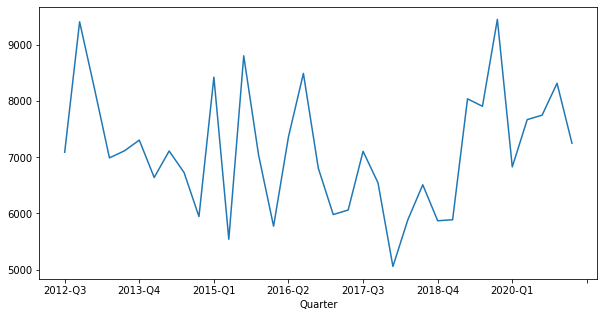

In [46]:
ii.plot(figsize = (10,5))

### Pregunta de investigación 1
¿Cuál de las cinco ingenierías tiene la mejor evolución?

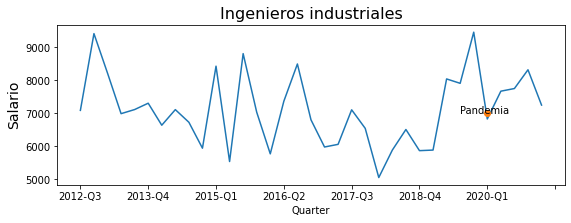

Text(0, 0.5, 'Salario')

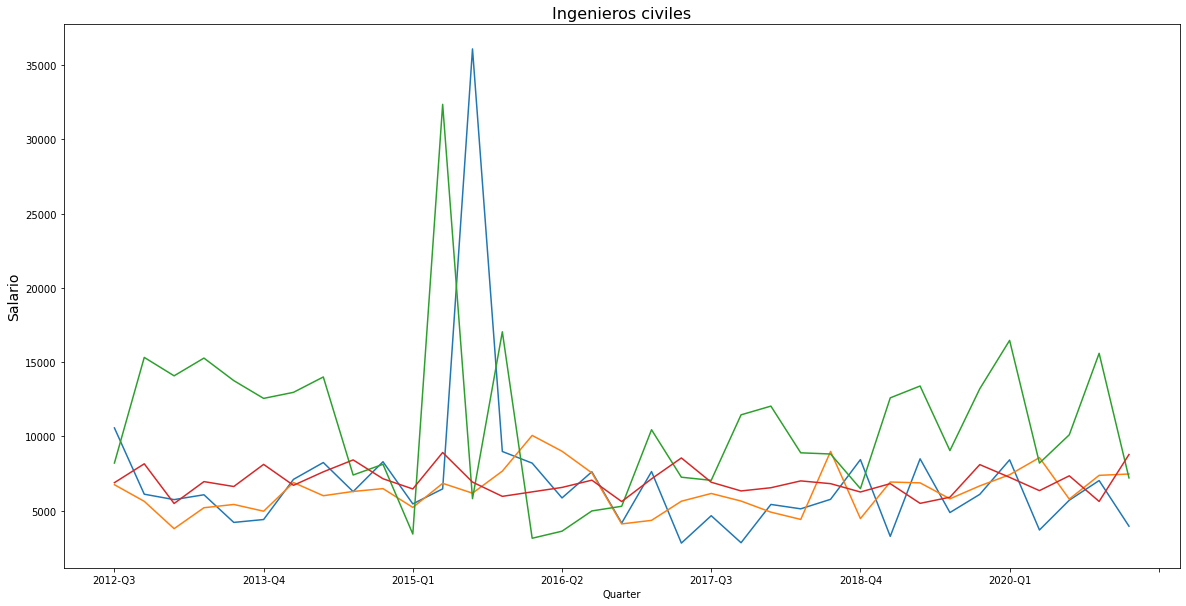

In [58]:
fig = plt.figure()
ax1 = fig.add_subplot(3, 2, 1) #1 columna, 2 renglones, posicion 1
ii.plot(figsize = (20,10))
plt.title('Ingenieros industriales', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)
plt.text(28, 7000, 'Pandemia')
plt.plot(30, 7000, 'o')
plt.show()

ax2 = fig.add_subplot(3, 2, 2) #1 columna, 2 renglones, posicion 2
iq.plot(figsize = (20,10))
plt.title('Ingenieros químicos', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)

ax3 = fig.add_subplot(3, 2, 3) #1 columna, 2 renglones, posicion 2
im.plot(figsize = (20,10))
plt.title('Ingenieros mecánicos', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)

ax4 = fig.add_subplot(3, 2, 4) #1 columna, 2 renglones, posicion 2
ip.plot(figsize = (20,10))
plt.title('Ingenieros en minas', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)

ax5 = fig.add_subplot(3, 2, 5) #1 columna, 2 renglones, posicion 2
ic.plot(figsize = (20,10))
plt.title('Ingenieros civiles', fontsize = 16)
plt.ylabel('Salario', fontsize = 14)

In [41]:
my_pivot = pd.pivot_table(df,
                          index = 'Occupation',
                          values = 'Monthly Wage',
                          #aggfunc = ['std','sum','mean','median']
                          aggfunc = 'mean',
                          margins = True
                         )
my_pivot

,Monthly Wage
Occupation,
Ingenieros Civiles y de la Construcción,6941.334691
Ingenieros Industriales,7113.893037
Ingenieros Mecánicos,6323.481937
Ingenieros Químicos,6970.578761
"Ingenieros en Minas, Metalurgia y Petróleo",10729.567045
All,7615.771094


In [67]:
quarter = df.iloc[:, 1]
quarter

Quarter
2012-Q3     20316
2012-Q4     17082
2013-Q1     17919
2013-Q2     17267
2013-Q3     19918
            ...  
2020-Q1     92135
2020-Q3    104608
2020-Q4     87693
2021-Q1    114755
2021-Q2     97892
Name: Workforce, Length: 175, dtype: int64

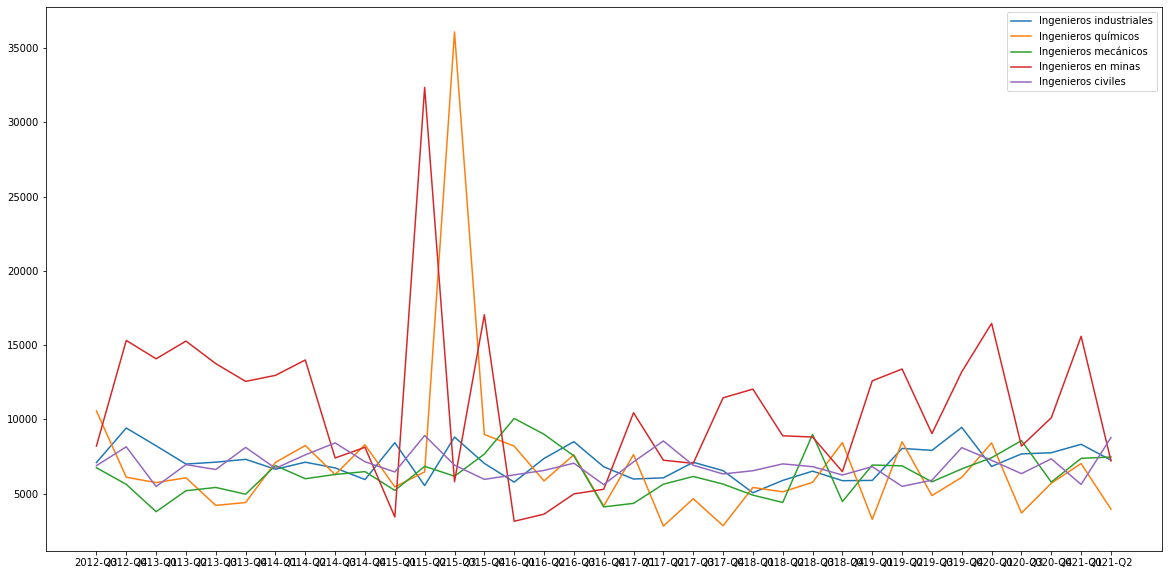

In [79]:
plt.figure(figsize = (20,10))

plt.plot(ii, label = 'Ingenieros industriales')
plt.plot(iq, label = 'Ingenieros químicos')
plt.plot(im, label = 'Ingenieros mecánicos')
plt.plot(ip, label = 'Ingenieros en minas')
plt.plot(ic, label = 'Ingenieros civiles')

plt.legend()
plt.show()